# Flight Price Prediction

In [1]:
#Importing necessarylibraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import  warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_excel('C:/Users/Ronav/Desktop/data trained & Flip Robo/Datatrained/Flight_Ticket_Participant_Datasets/Flight Ticket Data_Train.xlsx')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [15]:
df2=pd.read_excel('C:/Users/Ronav/Desktop/data trained & Flip Robo/Datatrained/Flight_Ticket_Participant_Datasets/Flight Ticket Data_Test.xlsx')

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


From the above analysis, it is known that:
1. The trianing data set is loaded into data frame 1 (df1) and the testing data is loaded into data frame 2 (df2).
2. df1:
    1. It has total 11 variables out of which 10 are feature variables and 1 target variable(Price)
    2. All the variables are of object type except the taget variable(ie. intiger type)
    3. "Route and Total_Stops" variables are having one null value, rest no null value is present in the data set.
    4. The data set has total 10683 rows.
3. df2:
    1. It has total 10 variables all of them are feature variables and 1 target variable(Price) is missing in the data set as    this a testing data set.
    2. All the variables are of object type. 
    3. No null value present in  the data set.
    4. The data set has total 2671 rows.

#### For exploratory data analysis (EDA), lets combine the data sets 

In [18]:
#Adding 'Price' Column in the test data set with all the values as '0'
df2['Price'] = 0

In [19]:
# Adding 'source' column in both training and testing data set with values as for training data=train and testing data=test
# so that the data set can be seperated in later stage while developing the model.
df1['source'] = 'train'
df2['source'] = 'test'

In [73]:
# merging both the data sets.
df= pd.concat([df1,df2], sort = False)
print(df1.shape, df2.shape, df.shape)

(10683, 12) (2671, 12) (13354, 12)


In [74]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train


From the above analysis it is seen that
1. Route column needs to be seperated as it contains multiple values
2. Arrival column has time and date both in the same column that needs to be seperated
3. Values given in teh total stops column needs to be symmetrical in nature.

#### Finding the unique values in the categorical data columns.

In [75]:
print('Number of Airlines:',df.Airline.nunique())
print('Name  of the Airlines:',df.Airline.unique())

Number of Airlines: 12
Name  of the Airlines: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [76]:
print('Number of Source Places:',df.Source.nunique())
print('Name  of the Source Palces:',df.Source.unique())

Number of Source Places: 5
Name  of the Source Palces: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [77]:
print('Number of Destination Places:',df.Destination.nunique())
print('Name  of the Destination Palces:',df.Destination.unique())

Number of Destination Places: 6
Name  of the Destination Palces: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [78]:
print('Number of Total Stops values:',df.Total_Stops.nunique())
print('Name  of the Total Stops Values:',df.Total_Stops.unique())

Number of Total Stops values: 5
Name  of the Total Stops Values: ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


In [79]:
print('Number of Additional Info values:',df.Additional_Info.nunique())
print('Name  of the Additional Info values:',df.Additional_Info.unique())

Number of Additional Info values: 10
Name  of the Additional Info values: ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


From the above analysis it is clear that there are 
1. 12 different airlines
2. source places are 5 and destination places are 6 all are different.
3. There is a nan value in Total Stops which is also seen in the initial analysis.All  the values needs to be converted to numerical form.
4. one value 'No info' and 'No Info' are written differently but having the same meaning, hence needs to be replaced with single value.

In [80]:
# Treating the date column
df.Date_of_Journey=df.Date_of_Journey.str.split('/')

In [81]:
df.Date_of_Journey

0       [24, 03, 2019]
1        [1, 05, 2019]
2        [9, 06, 2019]
3       [12, 05, 2019]
4       [01, 03, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [82]:
# Seperating date column in three different parts ie. 'Date, Month & Year'
df['Date']=df.Date_of_Journey.str[0]
df['Month']=df.Date_of_Journey.str[1]
df['Year']=df.Date_of_Journey.str[2]

In [83]:
#Treating Route Column
# As from the Total_stops column it is seen that there are maximum 4 stops. One source and One Destination
# Hence making total 6 cities where the flight stops.

df.Route=df.Route.str.split('→')

In [84]:
# Seperating six differnt stoping cities in six different columns.
df['City1']=df.Route.str[0]
df['City2']=df.Route.str[1]
df['City3']=df.Route.str[2]
df['City4']=df.Route.str[3]
df['City5']=df.Route.str[4]
df['City6']=df.Route.str[5]

In [85]:
# Treating Dep_Time Column
df.Dep_Time=df.Dep_Time.str.split(':')

In [86]:
# Seperating hours and minutes
df['Dep_Time_Hour']=df.Dep_Time.str[0]
df['Dep_Time_Min']=df.Dep_Time.str[1]

In [87]:
# Treating Arrival_Time Column
# This column has both the date and time so first seperating  date and time 
# And then seperating date into date, month and year and time into hours and minutes.  
df.Arrival_Time=df.Arrival_Time.str.split(' ')

In [88]:
#Seperating date and time of Arrival
df['Time_of_Arrival']=df.Arrival_Time.str[0]
df['Arrival_Date']=df.Arrival_Time.str[1]

In [89]:
# Seperating Time of Arrival
df.Time_of_Arrival=df.Time_of_Arrival.str.split(':')

In [90]:
df['Arrival_Time_Hour']=df.Time_of_Arrival.str[0]
df['Arrival_Time_Min']=df.Time_of_Arrival.str[1]

In [91]:
# Seperating hours of travel and minutes of travel from the column Duration
df.Duration=df.Duration.str.split(' ')

In [92]:
df['Travel_Hours']=df.Duration.str[0]
df['Travel_Mins']=df.Duration.str[1]

In [93]:
# Treating Travels Hours column as it contains numbers along with alphabet'h'
df.Travel_Hours=df.Travel_Hours.str.split('h')

In [94]:
# Removing 'h' from the numbers.
df['Travel_Hours']=df.Travel_Hours.str[0] 

In [95]:
#Treating Travel Mins column as it contains numbers aong with alhabet 'm'
df.Travel_Mins=df.Travel_Mins.str.split('m')

In [96]:
df['Travel_Mins']=df.Travel_Mins.str[0]

In [97]:
# Treating Total_Stops Column
# Replacinng 'non stop' with 0  
df.Total_Stops.replace('non-stop','0',inplace=True)

In [98]:
#Changing rest of the values to only neumeric one (1stop:1, 2stop:2, 3stop:3, 4stop:4)
df.Total_Stops=df.Total_Stops.str.split(' ')
df['Total_Stops']=df.Total_Stops.str[0]

In [99]:
# Treating Additional_Info Column
# As we have seen in the initial analysis that there are two ways of writing No Info so converting both the values in same format.
df.Additional_Info.replace('No info','No Info',inplace=True)

In [100]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Time_of_Arrival,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",0,No Info,...,NaN,NaN,22,20,"[01, 10]",22,01,10,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2,No Info,...,NaN,NaN,05,50,"[13, 15]",NaN,13,15,7,25


In [101]:
# Checking the Null values because new columns are being created
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
source                   0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 4341
City4                11397
City5                13296
City6                13352
Dep_Time_Hour            0
Dep_Time_Min             0
Time_of_Arrival          0
Arrival_Date          7953
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_Hours             0
Travel_Mins           1286
dtype: int64

In [102]:
df.shape

(13354, 29)

In [103]:
#Checking the row having the null values.
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Time_of_Arrival,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No Info,...,NaN,NaN,09,45,"[09, 25]",07,09,25,23,40


In [104]:
df[df['City1'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Time_of_Arrival,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No Info,...,NaN,NaN,09,45,"[09, 25]",07,09,25,23,40


In [105]:
df[df['City2'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_Time_Min,Time_of_Arrival,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
9039,Air India,"[6, 05, 2019]",Delhi,Cochin,NaN,"[09, 45]","[09:25, 07, May]","[23h, 40m]",NaN,No Info,...,NaN,NaN,09,45,"[09, 25]",07,09,25,23,40


In [106]:
# From the above analysis it is seen that row index number '9039' is having null value in four columns(which are showing single null value)
# Hence removing that row

In [108]:
df.drop(labels=9039,axis=0,inplace=True)

In [107]:
# Droping the columns City4,5,6 as these are having large number of null values.
df.drop(labels=['City4','City5','City6'],axis=1,inplace=True)

In [109]:
# Checking the null values and the data type of the columns as well as now there are 13353 total number of rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            13353 non-null  object
 1   Date_of_Journey    13353 non-null  object
 2   Source             13353 non-null  object
 3   Destination        13353 non-null  object
 4   Route              13353 non-null  object
 5   Dep_Time           13353 non-null  object
 6   Arrival_Time       13353 non-null  object
 7   Duration           13353 non-null  object
 8   Total_Stops        13353 non-null  object
 9   Additional_Info    13353 non-null  object
 10  Price              13353 non-null  int64 
 11  source             13353 non-null  object
 12  Date               13353 non-null  object
 13  Month              13353 non-null  object
 14  Year               13353 non-null  object
 15  City1              13353 non-null  object
 16  City2              13353 non-null  object

In [110]:
#Dropping those columns which we have splitted according to the values present in them
df.drop(labels=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Time_of_Arrival'],axis=1,inplace=True)

In [111]:
# Again checking the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            13353 non-null  object
 1   Source             13353 non-null  object
 2   Destination        13353 non-null  object
 3   Total_Stops        13353 non-null  object
 4   Additional_Info    13353 non-null  object
 5   Price              13353 non-null  int64 
 6   source             13353 non-null  object
 7   Date               13353 non-null  object
 8   Month              13353 non-null  object
 9   Year               13353 non-null  object
 10  City1              13353 non-null  object
 11  City2              13353 non-null  object
 12  City3              9013 non-null   object
 13  Dep_Time_Hour      13353 non-null  object
 14  Dep_Time_Min       13353 non-null  object
 15  Arrival_Date       5400 non-null   object
 16  Arrival_Time_Hour  13353 non-null  object

In [112]:
# Treating the nan values in City 3 : Filling these values with None as these might be the direct flight so having no stop in between
df['City3'].fillna('None',inplace=True)

In [113]:
# Treating Arrival_Date column: Nan values might be because of the the single day flight meansthe departure and arrival date are same.
# Hence filling the nan values with date column values.
df['Arrival_Date'].fillna(df['Date'],inplace=True)

In [115]:
# Treating Travel_Mins Column: The nan values might be because the flight duration is of round figure of hours
# Hence fillinng these values with '0'
df['Travel_Mins'].fillna(0,inplace=True)

In [116]:
# again checking the information about the null values.
df.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
source               0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_Date         0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_Hours         0
Travel_Mins          0
dtype: int64

#### All the null values in the data set are treated.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            13353 non-null  object
 1   Source             13353 non-null  object
 2   Destination        13353 non-null  object
 3   Total_Stops        13353 non-null  object
 4   Additional_Info    13353 non-null  object
 5   Price              13353 non-null  int64 
 6   source             13353 non-null  object
 7   Date               13353 non-null  object
 8   Month              13353 non-null  object
 9   Year               13353 non-null  object
 10  City1              13353 non-null  object
 11  City2              13353 non-null  object
 12  City3              13353 non-null  object
 13  Dep_Time_Hour      13353 non-null  object
 14  Dep_Time_Min       13353 non-null  object
 15  Arrival_Date       13353 non-null  object
 16  Arrival_Time_Hour  13353 non-null  object

In [119]:
# Comverting data types of numerical columnss from object to integer.
df.Total_Stops=df.Total_Stops.astype('int64')
df.Date=df.Date.astype('int64')
df.Month=df.Month.astype('int64')
df.Year=df.Year.astype('int64')
df.Dep_Time_Hour=df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Min=df.Dep_Time_Hour.astype('int64')
df.Arrival_Date=df.Arrival_Date.astype('int64')
df.Arrival_Time_Hour=df.Arrival_Time_Hour.astype('int64')
df.Arrival_Time_Min=df.Arrival_Time_Hour.astype('int64')
df.Travel_Hours=df.Travel_Hours.astype('int64')
df.Travel_Mins=df.Travel_Mins.astype('int64')

ValueError: invalid literal for int() with base 10: '5m'

#### The above error shows that there is a row in the data set having value as '5m' in the column 'Travel_Hours'. Hence finding out that row.

In [121]:
df[df['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No Info,17327,train,6,3,2019,BOM,GOI,PNQ,16,16,6,16,16,5m,0
2660,Air India,Mumbai,Hyderabad,2,No Info,0,test,12,3,2019,BOM,GOI,PNQ,16,16,12,16,16,5m,0


1. From the above analysis it is found that there are two rows with value '5m', One value in the training data set and one in the test data set, known with the help of 'source column created for indentifying training and testing dataset'
2. As it is clear from the above analysis the flight is from Bombay to Hydrabad and it is not possible to have the travel time as '5min', Hence deleting the rows.
3. As seen from the above analysis the index values are not the updated one hence updating the index value needs to be done, because teh index value 2660 belongs to test data set but it is also their with training data set.

In [122]:
#reseting the index values.
df.reset_index(inplace=True, drop=True)

In [123]:
# again finding out the rows with value as 5m in Travel_Hours column
df[df['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No Info,17327,train,6,3,2019,BOM,GOI,PNQ,16,16,6,16,16,5m,0
13342,Air India,Mumbai,Hyderabad,2,No Info,0,test,12,3,2019,BOM,GOI,PNQ,16,16,12,16,16,5m,0


In [124]:
df.drop(labels=[6474,13342],axis=0,inplace=True)

In [125]:
# Again trying to convert the numerical values from object type to integer type
df.Travel_Hours=df.Travel_Hours.astype('int64')
df.Travel_Mins=df.Travel_Mins.astype('int64')

Now there is no error and both te variables are converted from object to integer type

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 13352
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            13351 non-null  object
 1   Source             13351 non-null  object
 2   Destination        13351 non-null  object
 3   Total_Stops        13351 non-null  int64 
 4   Additional_Info    13351 non-null  object
 5   Price              13351 non-null  int64 
 6   source             13351 non-null  object
 7   Date               13351 non-null  int64 
 8   Month              13351 non-null  int64 
 9   Year               13351 non-null  int64 
 10  City1              13351 non-null  object
 11  City2              13351 non-null  object
 12  City3              13351 non-null  object
 13  Dep_Time_Hour      13351 non-null  int64 
 14  Dep_Time_Min       13351 non-null  int64 
 15  Arrival_Date       13351 non-null  int64 
 16  Arrival_Time_Hour  13351 non-null  int64

#### Plotting countplots for categorical data

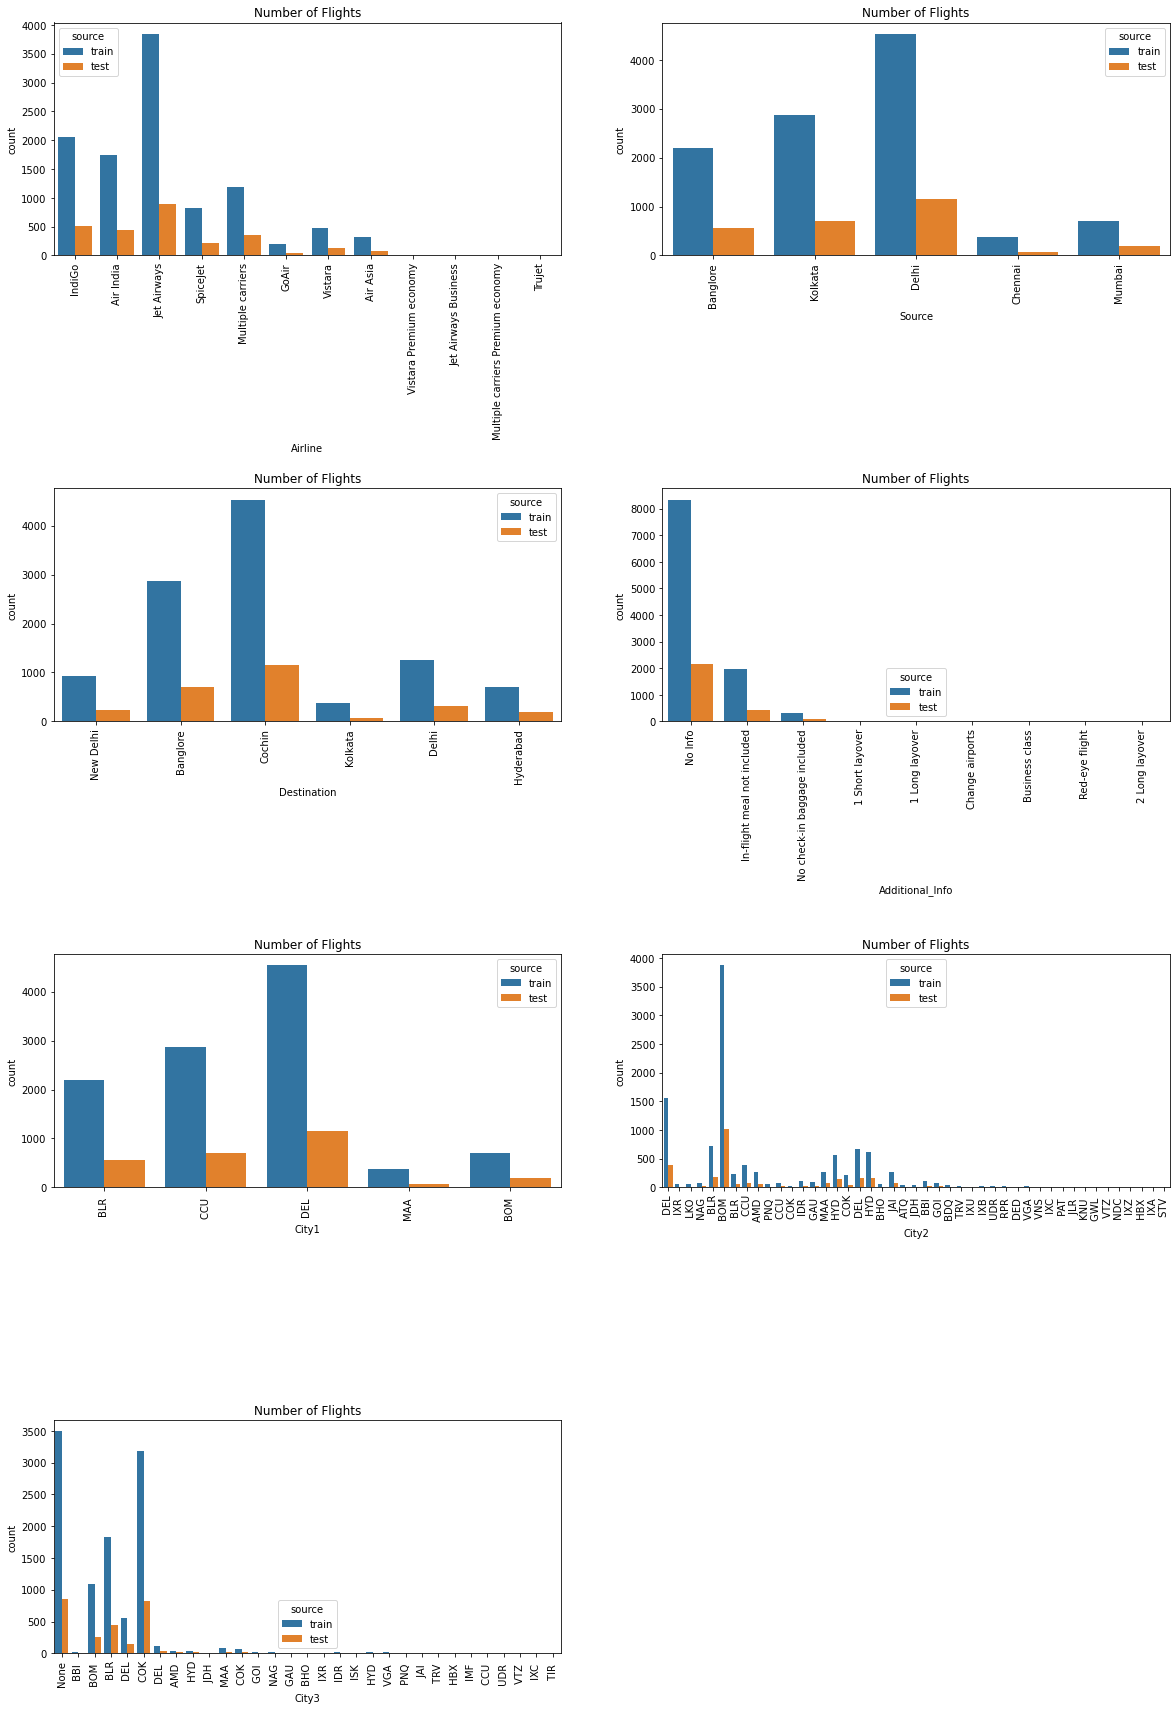

In [131]:
variables=['Airline','Source','Destination','Additional_Info', 'City1','City2','City3']
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(variables):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df, hue='source')
    plt.xticks(rotation=90)
    plt.title("Number of Flights")

From the above analysis:
1. It is seen that the number of flights of Jet Airways are more in numbers in test and train set both as compared to other flights.
2. Majorly the flights Source (Starting Point) for train and test set both is Delhi followed by Kolkata then Banglore.
3. Majorly the flights Destination (End Point) for train and test set both is Cochin followed by Banglore then Delhi.
4. In Additional_Info variable the flights with additional information are less in numbers in both test and train data set
5. City1 data analysis is similar with the Source column data analysis
6. From City 2 data it is seen that most od the flights stops in Bombay followed by Delhi, Hydrabad and Banglore. In this varibale the is a duplication of city names with spaces. The cities are-DEL, BLR, CCU, COK & HYD. Hence these have to be converted to same notations.
7. Most of the flights are not having any second stopage or the flights have mostly Cochin, Banglore, Bombay & then Delhi as the stoppage in both test and train data sets. The same type of duplication of city names(DEL,COK,HYD) is also found in the City3 variable.


In [133]:
# Removing the duplication in city names fro Variables City2 and City3
df.City2.replace(' DEL',' DEL ',inplace=True)

In [135]:
df.City2.replace(' BLR',' BLR ',inplace=True)
df.City2.replace(' CCU',' CCU ',inplace=True)
df.City2.replace(' COK',' COK ',inplace=True)
df.City2.replace(' HYD',' HYD ',inplace=True)

In [136]:
df.City2.unique()

array([' DEL ', ' IXR ', ' LKO ', ' NAG ', ' BLR ', ' BOM ', ' CCU ',
       ' AMD ', ' PNQ ', ' COK ', ' IDR ', ' GAU ', ' MAA ', ' HYD ',
       ' BHO ', ' JAI ', ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ',
       ' TRV ', ' IXU ', ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ',
       ' VNS ', ' IXC ', ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ',
       ' NDC ', ' IXZ ', ' HBX ', ' IXA ', ' STV '], dtype=object)

In [138]:
df.City3.replace(' BLR',' BLR ',inplace=True)
df.City3.replace(' DEL',' DEL ',inplace=True)
df.City3.replace(' COK',' COK ',inplace=True)
df.City3.replace(' HYD',' HYD ',inplace=True)

In [139]:
df.City3.unique()

array(['None', ' BBI ', ' BOM ', ' BLR ', ' DEL ', ' COK ', ' AMD ',
       ' HYD ', ' JDH ', ' MAA ', ' GOI ', ' NAG ', ' GAU ', ' BHO ',
       ' IXR ', ' IDR ', ' ISK ', ' VGA ', ' PNQ ', ' JAI ', ' TRV ',
       ' HBX ', ' IMF ', ' CCU ', ' UDR ', ' VTZ ', ' IXC ', ' TIR '],
      dtype=object)

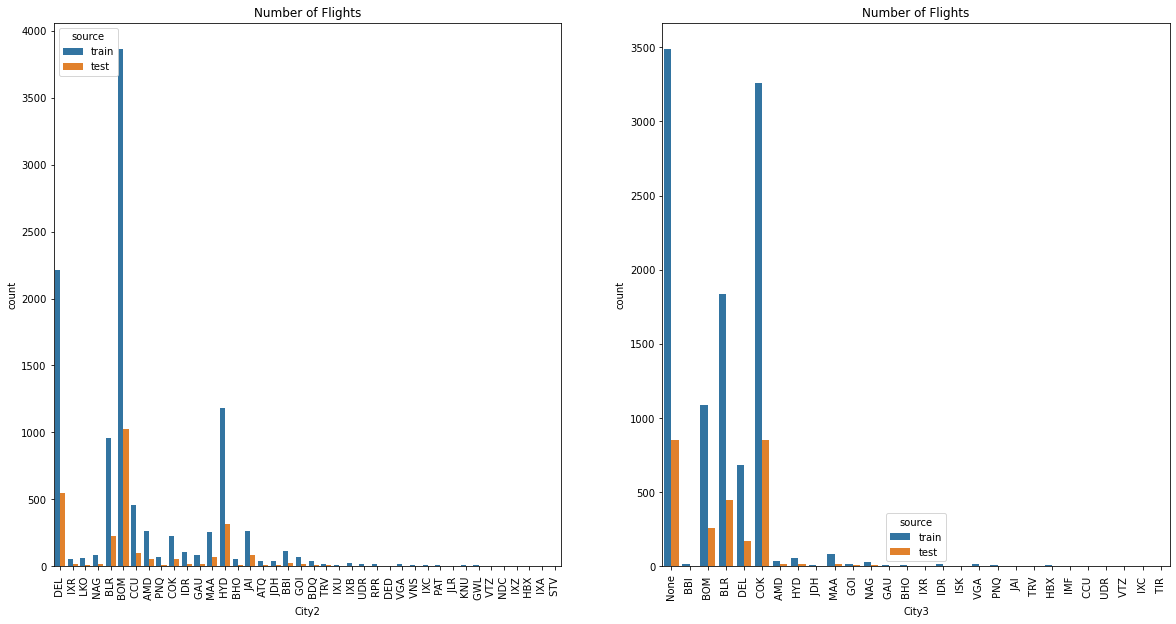

In [140]:
# Again plotting the countplots of the two variables City2 and City 3
variables=['City2','City3']
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df, hue='source')
    plt.xticks(rotation=90)
    plt.title("Number of Flights")

The observations are same as before.

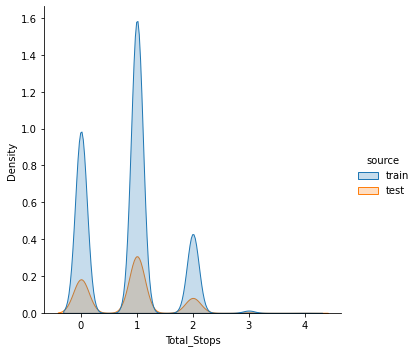

In [147]:
# Checking with the numerical data with the help of distplot.
sns.displot(df, x='Total_Stops', hue="source", kind="kde", fill=True)

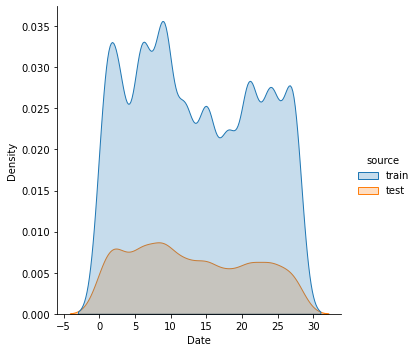

In [148]:
sns.displot(df, x='Date', hue="source", kind="kde", fill=True)

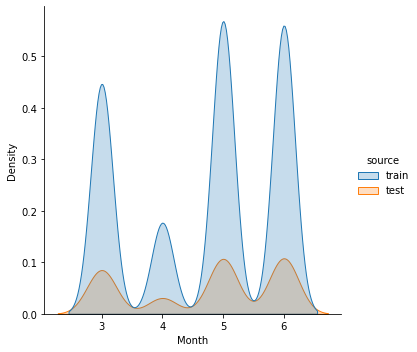

In [149]:
sns.displot(df, x='Month', hue="source", kind="kde", fill=True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

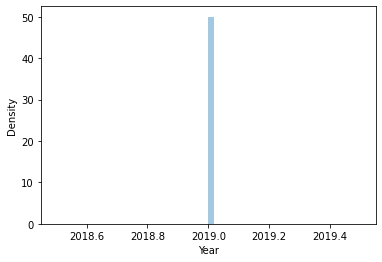

In [154]:
sns.distplot(df['Year'])

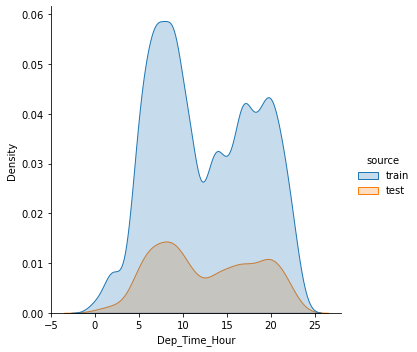

In [155]:
sns.displot(df, x='Dep_Time_Hour', hue="source", kind="kde", fill=True)

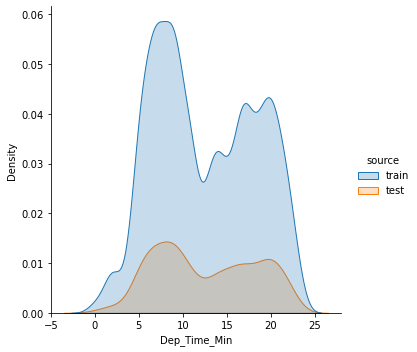

In [157]:
sns.displot(df, x='Dep_Time_Min', hue="source", kind="kde", fill=True)

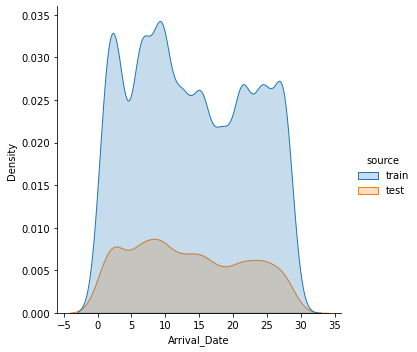

In [158]:
sns.displot(df, x='Arrival_Date', hue="source", kind="kde", fill=True)

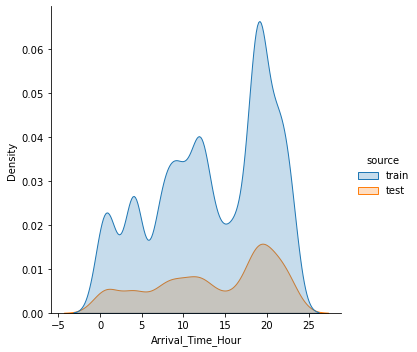

In [159]:
sns.displot(df, x='Arrival_Time_Hour', hue="source", kind="kde", fill=True)

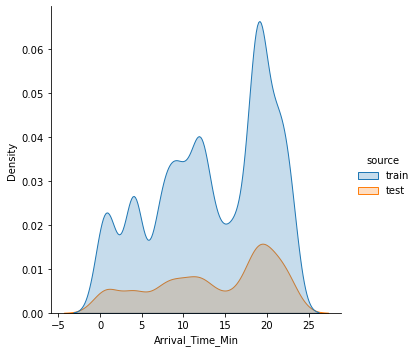

In [160]:
sns.displot(df, x='Arrival_Time_Min', hue="source", kind="kde", fill=True)

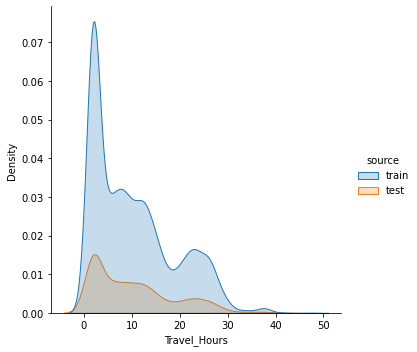

In [161]:
sns.displot(df, x='Travel_Hours', hue="source", kind="kde", fill=True)

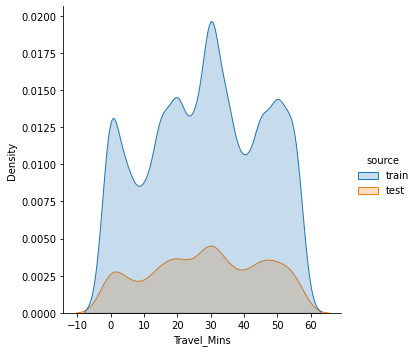

In [162]:
sns.displot(df, x='Travel_Mins', hue="source", kind="kde", fill=True)

From the above analysis it is clear that:
1. Both train and test set follows the same pattern in the density plot.
2. Density of one stop is higher than the no stop followed by 2 stop and three stops. Means there are more number of flights having single stop then followed by direct flights.
3. The density is almost similar for all the dates.
4. There ae more number of flights in 3rd 5th and 6th month.
5. As the data is of 2019 only hence the entire density is concenrated over there, so it can be dropped.
6. Overall the test and the train data set follows the same density distribution .

In [163]:
# Droping the year column as it has 2019 in each row.
df.drop(labels=['Year'], axis=1, inplace=True)

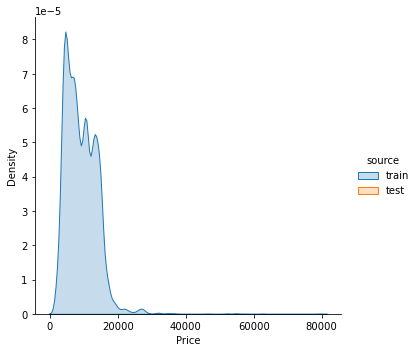

In [165]:
#density plot of the Target variable
sns.displot(df, x='Price', hue="source", kind="kde", fill=True)

In [172]:
print('Maximum Price:',df.Price.max())
print('Minimum Price:',df.groupby(['source'])['Price'].min())

Maximum Price: 79512
Minimum Price: source
test        0
train    1759
Name: Price, dtype: int64


From the above distplot it is clear that:
1. The highest price of the ticket is Rs.79,512.
2. The lowest price comes out to be Rs.0, beacuse we have inserted price column with '0' values in the test dataset for the ease of Exploratory data analysis.
3. Hence finding out the price by grouping it with source, so train data set has minium price is Rs.1,759
4. The maximum density of Price is between Rs.1,759 and Rs20,000. Means maximum ticket priced between this range.

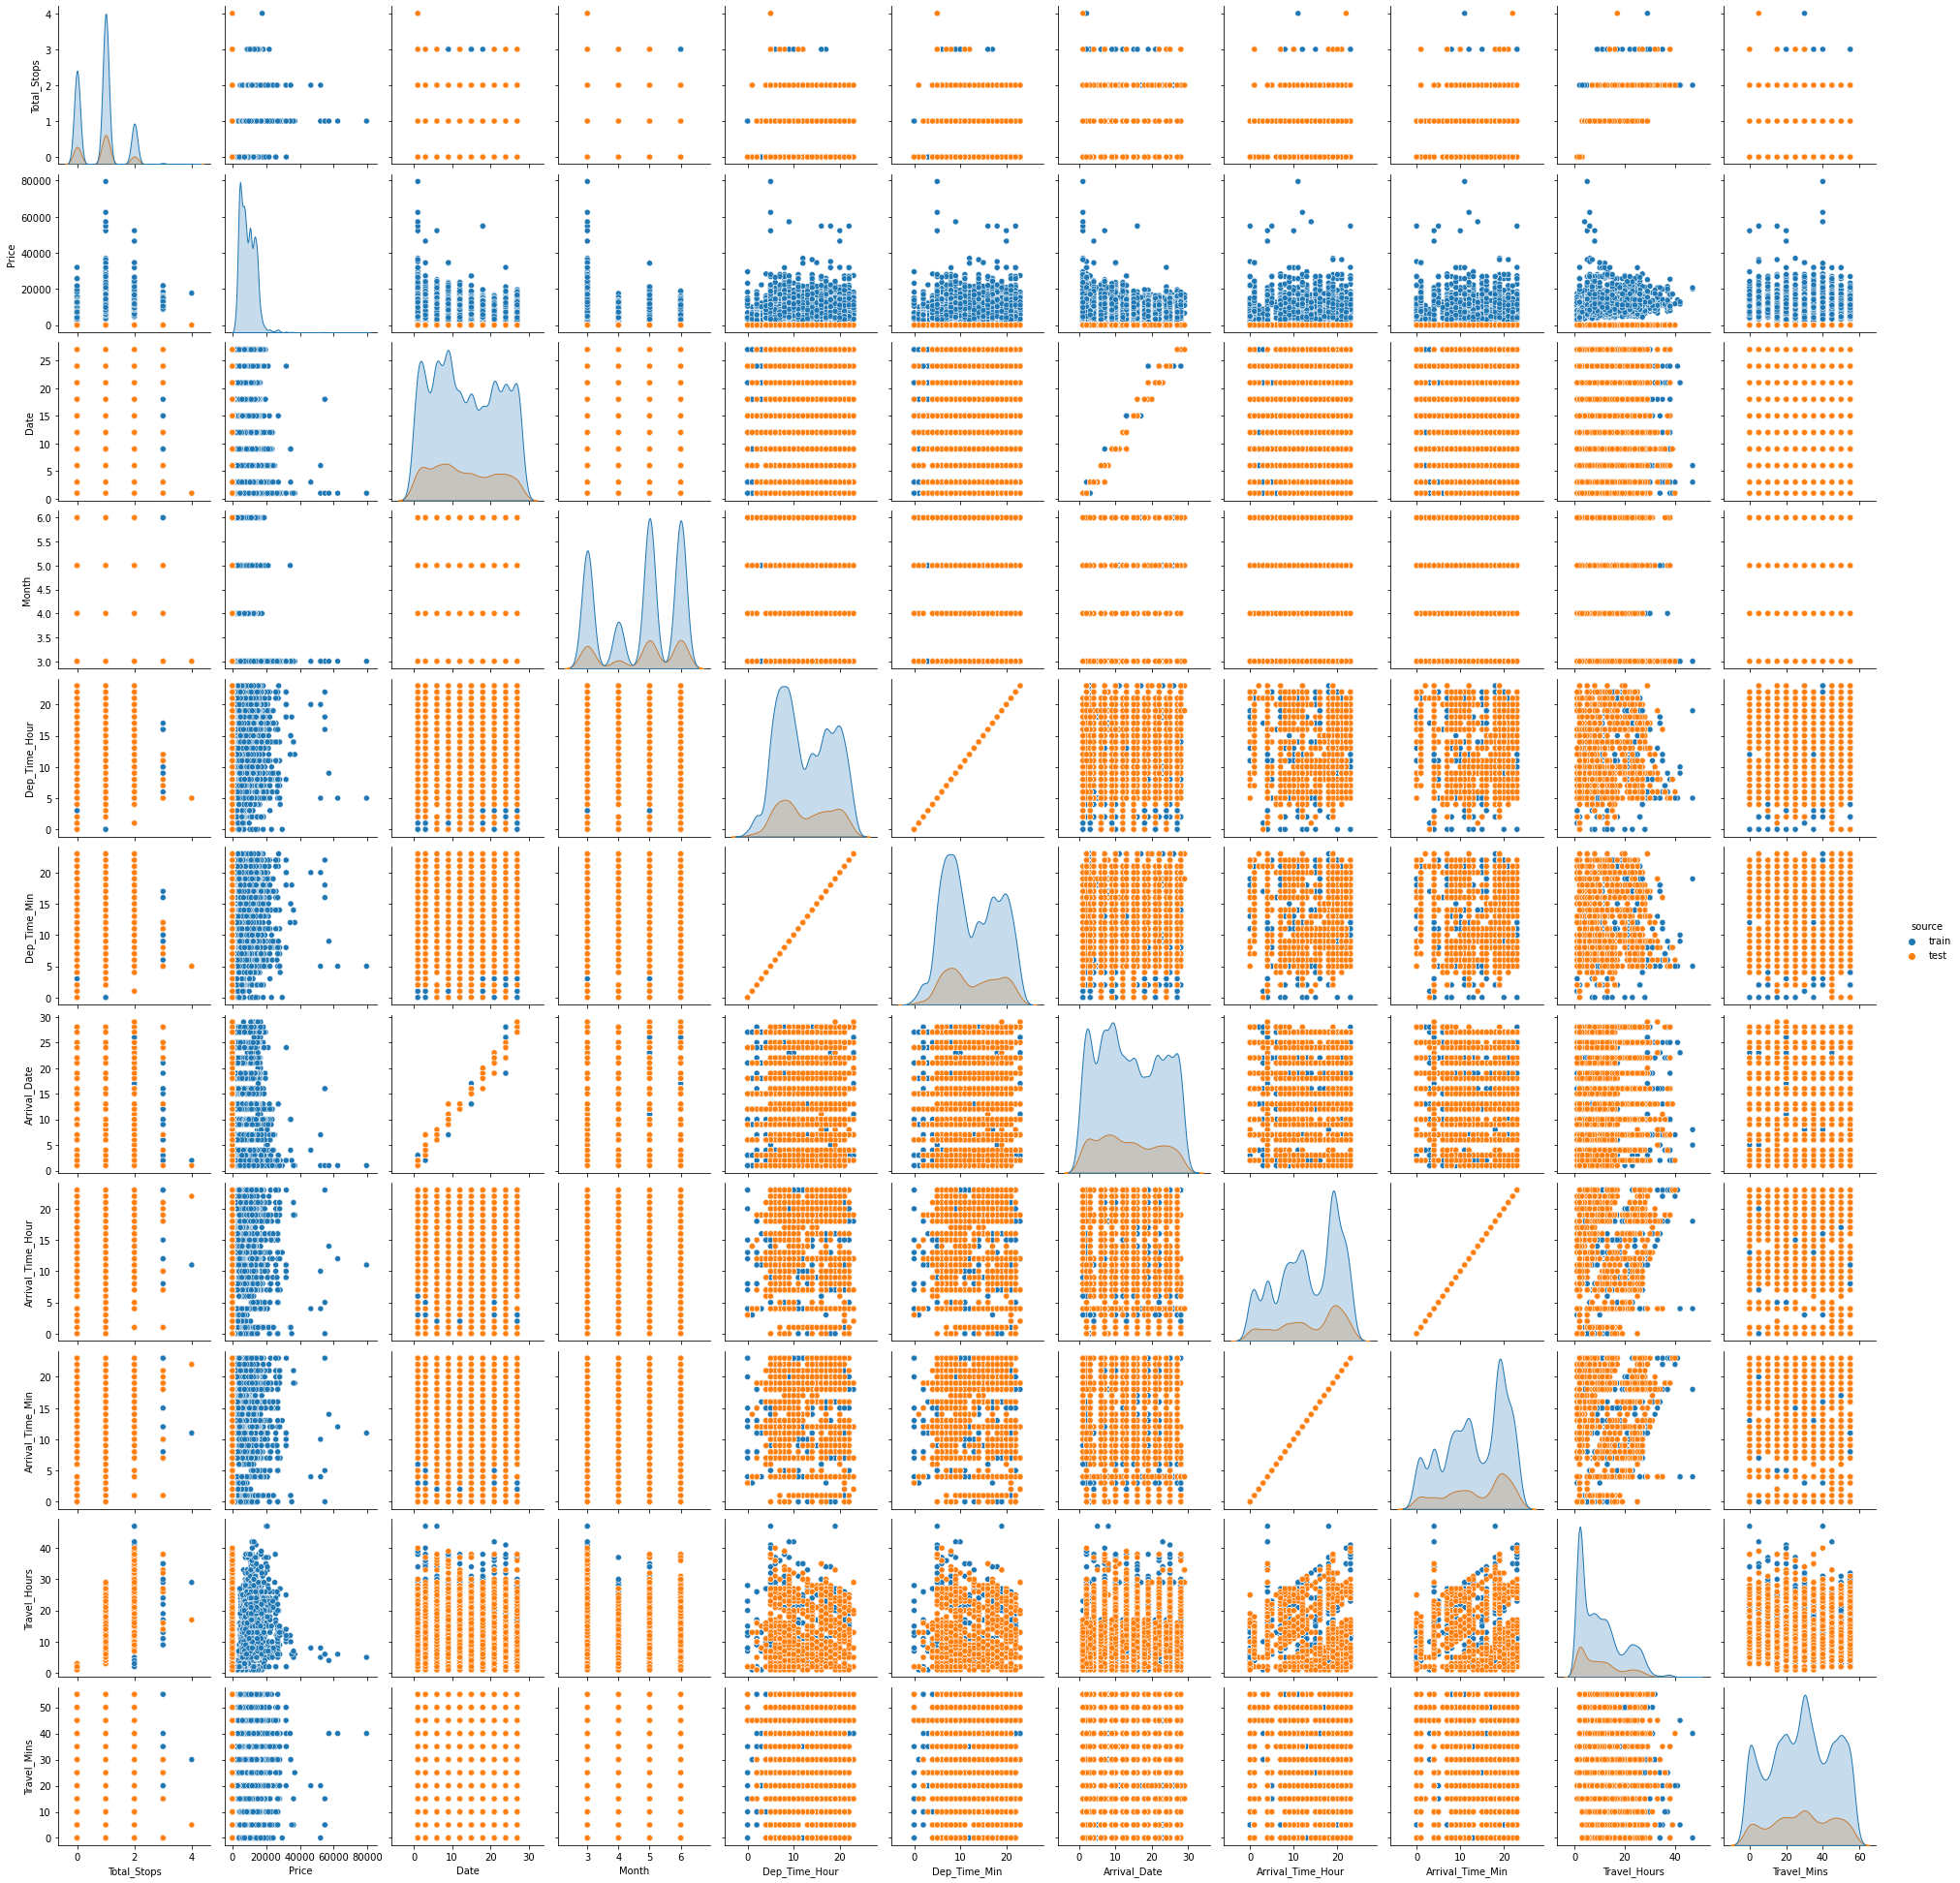

In [174]:
sns.pairplot(df, hue='source',height=2.5, aspect=1)

Total_Stops              AxesSubplot(0.125,0.71587;0.227941x0.16413)
Price                 AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Date                  AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Month                   AxesSubplot(0.125,0.518913;0.227941x0.16413)
Dep_Time_Hour        AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Dep_Time_Min         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Arrival_Date            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Arrival_Time_Hour    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Arrival_Time_Min     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Travel_Hours               AxesSubplot(0.125,0.125;0.227941x0.16413)
Travel_Mins             AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

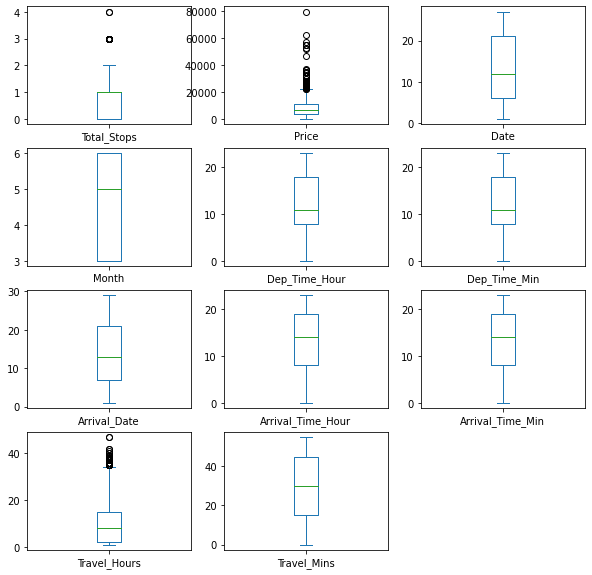

In [175]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

There are outliers in Total_Stops,Price and Travel_Hours but these outliers cannot be removed as Price might be impacted by rest of the two variables.  

<AxesSubplot:>

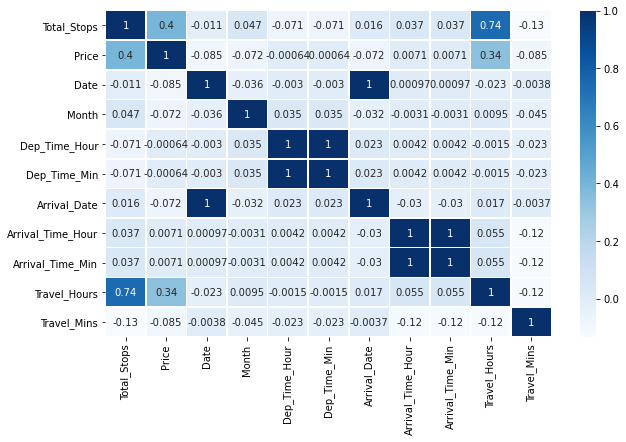

In [178]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidths=.5)

From the above heatmap the target variable Price is having a decent correlation with Travel_Hours and Total_Stops

In [179]:
# Checking the skewness in the data set
df.skew()

Total_Stops          0.318029
Price                0.980609
Date                 0.134821
Month               -0.390963
Dep_Time_Hour        0.109208
Dep_Time_Min         0.109208
Arrival_Date         0.136202
Arrival_Time_Hour   -0.384540
Arrival_Time_Min    -0.384540
Travel_Hours         0.857632
Travel_Mins         -0.093661
dtype: float64

From the above values of skewness it is clear that the skewness values of two variables is above the threshold value (+/- 5).
Price is the target variable so it not be treated .
Skewness of Travel_Hours is higher hence it has to be treated.

In [180]:
# Treating the skewness
df.Travel_Hours=np.log(df.Travel_Hours)

In [181]:
df.Travel_Hours.skew()

-0.2721996127824562

#### Encoding the Categorical Data

In [182]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Airline','Source','Destination','Additional_Info', 'City1','City2','City3']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [183]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,source,Date,Month,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
0,3,0,5,0,6,3897,train,24,3,0,10,27,22,22,22,1,1,0.693147,50
1,1,3,0,2,6,7662,train,1,5,2,20,1,5,5,1,13,13,1.945910,25
2,4,2,1,2,6,13882,train,9,6,3,27,4,9,9,10,4,4,2.944439,0


Changed Data Frame

### Dividing the data Back into Train data set and Test Data set

In [184]:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

In [185]:
# Dropping unneccessary column
train.drop(['source'],axis=1,inplace=True)
test.drop(['Price','source'],axis=1,inplace=True)

In [196]:
print('train data set shape:',train.shape)
print('test data set shape:',test.shape)

train data set shape: (10681, 18)
test data set shape: (2670, 17)


 In the initial data set the test set is having 2,671 number of rows and training data set is having 10,683 rows . Now afterprecessing the data 2 rows from the training data and 1 rowfrom the test data is being reduced.

In [186]:
train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
0,3,0,5,0,6,3897,24,3,0,10,27,22,22,22,1,1,0.693147,50
1,1,3,0,2,6,7662,1,5,2,20,1,5,5,1,13,13,1.945910,25


In [187]:
test.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
10682,4,2,1,1,6,6,6,3,6,6,17,17,7,4,4,2.302585,55
10683,3,3,0,1,6,12,5,2,28,3,6,6,12,10,10,1.386294,0


In [188]:
# resetting the index values of test data set.
test.reset_index(inplace=True, drop=True)

In [189]:
test.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_Date,Arrival_Time_Hour,Arrival_Time_Min,Travel_Hours,Travel_Mins
0,4,2,1,1,6,6,6,3,6,6,17,17,7,4,4,2.302585,55
1,3,3,0,1,6,12,5,2,28,3,6,6,12,10,10,1.386294,0


### Splitting the train data set into feature variables and target variable

In [190]:
x=train.drop('Price',axis=1)
y=train['Price']

### Scaling the Data: Normalising the Data

In [193]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

### Splitting the data set into trainig and testing parts

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (7476, 17)
ytrain shape: (7476,)
xtest shape: (3205, 17)
ytest shape: (3205,)


### Developing the Model

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Fitting Regression Models

In [204]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print('lr coef:',lr.coef_)
print('lr intercept:',lr.intercept_)
pred=lr.predict(xtest)
print('lr score:',lr.score(xtest,ytest))

lr coef: [ 3.38616066e+02 -7.02944942e+01  5.12387874e+02  1.78784436e+03
 -1.11073425e+02 -6.51465803e+02 -4.01563675e+02 -3.56484948e+02
 -6.75504309e+02 -1.03849743e+03  6.18455835e+01  6.18455835e+01
 -1.46870412e+00 -5.51355114e+01 -5.51355114e+01  7.65843288e+02
 -1.62670473e+02]
lr intercept: 9064.95009114472
lr score: 0.48007249542757335


In [205]:
rdg=Ridge(alpha=0.0001, random_state=45)
rdg.fit(xtrain,ytrain)
print('Ridge score:',rdg.score(xtrain,ytrain))
predict=rdg.predict(xtest)
print('r2_score:',r2_score(ytest,predict))

Ridge score: 0.5066226618793969
r2_score: 0.4800725001593531


In [206]:
lso=Lasso(alpha=.0001,random_state=45)
lso.fit(xtrain,ytrain)
print('Lasso score:',lso.score(xtrain,ytrain))
predict1=lso.predict(xtest)
print('r2 score:',r2_score(ytest,predict1))

Lasso score: 0.5066226503362372
r2 score: 0.4800599401972674


In [207]:
en=ElasticNet(alpha=0.0001, random_state=45)
en.fit(xtrain,ytrain)
print('ElasticNet score:',en.score(xtrain,ytrain))
predict2=en.predict(xtest)
print('r2 score:',r2_score(ytest,predict2))

ElasticNet score: 0.5066226596261929
r2 score: 0.48007580093952584


In [213]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtr score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtr r2_score:', r2_score(ytest,dtrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,dtrpredict))
print("Mean squared error of dtr = ", mean_squared_error(ytest,dtrpredict))
print("Root Mean squared error of dtr = ",np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtr score: 0.9965479067943176
dtr r2_score: 0.8263596300813795
Mean absolute error is= 711.8569942797712
Mean squared error of dtr =  3904610.2935344083
Root Mean squared error of dtr =  1976.008677494714


In [214]:
k=5
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(xtrain,ytrain)
print('knr score:',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('knr r2_score:',r2_score(ytest,knrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,knrpredict))
print("Mean squareed error of knr =",mean_squared_error(ytest,knrpredict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(ytest,knrpredict)))

knr score: 0.8461133815031965
knr r2_score: 0.752516084745253
Mean absolute error is= 1270.0648361934477
Mean squareed error of knr = 5565112.787082683
Root Mean squared error of knr= 2359.049127738268


In [215]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('sgd score:',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('sgd r2_score:', r2_score(ytest,sgd1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,sgd1predict))
print("Mean squared error of sgd=",mean_squared_error(ytest,sgd1predict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(ytest,sgd1predict)))

sgd score: 0.5051382979122506
sgd r2_score: 0.47861829773054887
Mean absolute error is= 2314.7474374393128
Mean squared error of sgd= 11724188.116484081
Root Mean squared error of sgd= 3424.060180032483


From the above model fitting the model score and the r2 score as well as RMSE scores are best for Decision Tree Regressor, i.e r2 score of 82% and all the three values 'Meean Absolute error, Mean Squared error and Root mean squared error are least among all the developed models.

### Using Ensemble Techniques: To improve  the model performance.

In [219]:
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
print('rfr score:',rfr.score(xtrain,ytrain))

rfr1predict=rfr.predict(xtest)
print('rfr r2_score:', r2_score(ytest,rfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,rfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,rfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,rfr1predict)))

rfr score: 0.9830440392155083
rfr r2_score: 0.8407168173904425
Mean absolute error is= 703.6761423296933
Mean squared error of rfr= 3581763.588131501
Root Mean squared error of rfr= 1892.5547781059074


In [218]:
abr=AdaBoostRegressor()
abr.fit(xtrain,ytrain)
print('abr score:',abr.score(xtrain,ytrain))

abr1predict=abr.predict(xtest)
print('abr r2_score:', r2_score(ytest,abr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,abr1predict))
print("Mean squared error of abr=",mean_squared_error(ytest,abr1predict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(ytest,abr1predict)))

abr score: 0.32459032619119677
abr r2_score: 0.2886558597118797
Mean absolute error is= 3137.7815142993795
Mean squared error of abr= 15995828.929160371
Root Mean squared error of abr= 3999.478582160476


From the above two Ensemble techniques used the Random Forest Classifier is performing with r2 score as 84% which is better than the Decision Tree Regressor scores.

### Cross Validation: using K fold cross vaidation technique to test the overfitting of the model.

Going for Cross Validation of two 1. Decision Tree Regressor 2. Random Forest Regressor

In [226]:
# Cross validating DEcision Tree Regressor Model

score=cross_val_score(dtr,xtrain,ytrain,cv=KFold)
print(score)
print(score.mean())
print(score.std())

[0.78880325 0.71318268 0.85747263 0.83884169 0.66740203 0.87221373
 0.7943356  0.8872697  0.91813514 0.86552274]
0.8203179177088942
0.07552515313239769


In [228]:
# Cross validating Random forest Regressor Model

score=cross_val_score(rfr,xtrain,ytrain,cv=KFold)
print(score)
print(score.mean())
print(score.std())

[0.9095469  0.69511893 0.91961114 0.92551164 0.79568065 0.91337251
 0.87724669 0.91246193 0.93310442 0.9217613 ]
0.8803416101822785
0.07248595279436279


#### From the Cross Validation of both the models, it is known that random forest regressor model is giving the cross validation score as 88%. and decision tree is giving the score of 82 %.
#### Hence going ahead with Hyper parameter tuning to improve the accurace of the models.

### Hyper Parameter Tuning

##### Random forest Regressor

In [252]:
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2','sqrt',None], 
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [253]:
g_search = GridSearchCV(estimator = rfr, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1,
                        verbose = 0, 
                        return_train_score=True)

In [254]:
g_search.fit(xtrain, ytrain);

In [255]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 40}


In [256]:
modelrfr=RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'log2', n_estimators=40 )
modelrfr.fit(xtrain,ytrain)
print('modelrfr score:',modelrfr.score(xtrain,ytrain))

modelrfr1predict=modelrfr.predict(xtest)
print('modelrfr r2_score:', r2_score(ytest,modelrfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,modelrfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,modelrfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,modelrfr1predict)))

modelrfr score: 0.9821530493442842
modelrfr r2_score: 0.835138966322901
Mean absolute error is= 847.6981303952158
Mean squared error of rfr= 3707191.41752585
Root Mean squared error of rfr= 1925.4068187076334


### Saving the Model

In [270]:
import joblib

joblib.dump(modelrfr,'rfr_flight_price_prediction_model.obj')

rfrloadmodel=joblib.load('rfr_flight_price_prediction_model.obj')
pred=rfrloadmodel.predict(xtest)
print(pred)

[ 4481.075   13205.29375  9747.05    ...  4053.      10134.875
  4802.7    ]


In [273]:
# Creating a data frame with Actual and predicted  values.
predicted_values=pd.DataFrame({'Actual':ytest,'Predicted':pred})

In [274]:
predicted_values

,Actual,Predicted
7265,4148,4481.075000
62,12524,13205.293750
10260,11627,9747.050000
8822,7229,5144.944167
8947,3210,3243.425000
...,...,...
8856,23001,14962.625000
1899,8307,13645.700000
1857,4107,4053.000000
1747,11627,10134.875000


In [275]:
test_set_predicted=rfrloadmodel.predict(test)
test_set_predicted

array([7568.5125, 7254.8   , 7568.5125, ..., 7568.5125, 7204.8375,
       7568.5125])

In [276]:
predicted_price=pd.DataFrame({'Price':test_set_predicted})

In [277]:
predicted_price

,Price
0,7568.5125
1,7254.8000
2,7568.5125
3,7567.9375
4,8628.4750
...,...
2665,7519.7625
2666,7011.0500
2667,7568.5125
2668,7204.8375
